#Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

print(tf.__version__)

2.3.0


#Loading Data

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Checking Data

5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0 

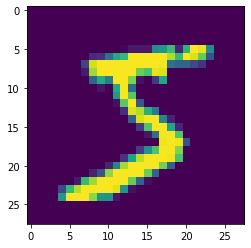

In [4]:
np.set_printoptions(linewidth=200)

plt.imshow(x_train[0])
print(y_train[0])
print(x_train[0])

Callback Function

In [5]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('accuracy') > 0.95):
      print('\naccuracy threshold reached')
      self.model.stop_training = True
                
callbacks = myCallback()

#Normalizing

In [6]:
x_train = x_train / 255.0
x_test  = x_test  / 255.0

#Sequential creation of Neural Network Layer

In [7]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
                                    ])

#Data Compilation

In [8]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

#Fitting the trained data into the model

In [9]:
model.fit(x_train, y_train, epochs = 3, callbacks = [callbacks])

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2591 - accuracy: 0.9264
Epoch 2/3
1852/1875 [============================>.] - ETA: 0s - loss: 0.1145 - accuracy: 0.9671
accuracy threshold reached
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1142 - accuracy: 0.9673


#First predicted value

In [10]:
predictions = model.predict(x_test)

print("real value :",y_test[0])
print("predicted value :",np.argmax(predictions[0]))

real value : 7
predicted value : 7


#Checking the loss on the Test Data

In [11]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, batch_size=64)
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))

157/157 [==============================] - 0s 1ms/step - loss: 0.1048 - accuracy: 0.9689
Test loss: 0.1048 accuracy: 0.9689


In [12]:
from keras.utils import to_categorical

num_classes = 10;
test_labels_cat = to_categorical(y_test,num_classes)
test_labels_cat[0] 

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

#Checking the first 20 Predictions and matching it with the Test Data

In [13]:
first20_preds = np.argmax(predictions, axis=1)[:20]
first20_true = np.argmax(test_labels_cat,axis=1)[:20]
print(first20_preds)
print(first20_true)

[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


#Total Error / 10,000

In [16]:
error = (np.argmax(predictions, axis=1) != np.argmax(test_labels_cat,axis=1)).sum()

#Error %

In [18]:
error_percent = error/x_test.shape[0] * 100
print(error_percent)

3.11
